In [166]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
#the mdoel is utilsisng the pylcp package as the mmain package doing the calculations for the model the others are basic inbuilt packages
#the two data frames are decasy which a caculation of all the energy levels decay rates. 
# the others is all the possible decay rate from each levels and there corrosponidng decay rates
#functools packaga use cache 
#put this when ussing the compute- Users/ucapbfb/
import numpy as np
import matplotlib.pyplot as plt
import pylcp as pp
import scipy.constants as sp
import pandas as pd
import random
import pandas as pd
from fractions import Fraction
import matplotlib.colors as mcolors
import scipy.constants as cts
decays = pd.read_parquet('data/decays_ac.parquet')
df_ac = pd.read_excel('data/acditransitions.xlsx')
gamma_r = 99569919.76594706/1000



In [248]:
def Isat(i,j,Gamma):
    omega =  (i-j)*29.9792458*1e9
    sat = cts.hbar*(omega)**3*(2*np.pi*Gamma)/(12*np.pi*cts.c**2)
    return sat



In [249]:
def p(s,Isat,r):
    power = s*Isat*np.pi*r/2
    return power 

In [129]:
46960 - 21583.8

used_colors = set()

def get_distinct_color():
    '''
    this is a function which allows for a distinct coloru to used to plot a graph in python
    there are so many plots for the rate eqaution for each m_f lavel that it was needed
    '''
    base_colors = list(mcolors.TABLEAU_COLORS.values())  # You can use other color palettes as well
    available_colors = [color for color in base_colors if color not in used_colors]

    if not available_colors:
        # Reset used_colors if all colors have been used
        used_colors.clear()
        available_colors = base_colors

    color = available_colors[0]
    used_colors.add(color)
    return color

In [130]:

used_colors = set()

def get_distinct_color():
    '''
    this is a function which allows for a distinct coloru to used to plot a graph in python
    there are so many plots for the rate eqaution for each m_f lavel that it was needed
    '''
    base_colors = list(mcolors.TABLEAU_COLORS.values())  # You can use other color palettes as well
    available_colors = [color for color in base_colors if color not in used_colors]

    if not available_colors:
        # Reset used_colors if all colors have been used
        used_colors.clear()
        available_colors = base_colors

    color = available_colors[0]
    used_colors.add(color)
    return color

In [131]:
#alpha is fine structre constant and rc is a unit conversion form au to hz
alpha = 1/137
Rc = ((4/3)*(alpha/219745)**3)*(1/(2.418e-17))

def g(i,j,med,jj):
    '''
    This allows for the cacultation of the decay rate in units of hz
    variables:
    i(flaot): this is the inintial energy levels ,units are cm^-1
    j(float):this is the level that it decays to in: cm^-2u
    med(float): dipole matrix elemnet in atomic units 
    jj(int): this it the total angular momentum of the upper level
    '''
    a = ((i-j)**3)*(med)**2/(2*jj + 1)
    return a*Rc

In [132]:
def med(i,j):
        '''
        This returning the dipole matrix elemnt from a pandas data
        i: final level  units cm^-1
        j: intial level units cm^-1        
        '''
        Eo = df_ac['E1'].tolist()
        if  i in Eo:
            c =  df_ac[(df_ac['E1'] == i) & (df_ac['E2'] == j)]['Med'].tolist()[0]# matrix dipole element for the pscific energy level
        if j in Eo:
            c =  df_ac[(df_ac['E2'] == i) & (df_ac['E1'] == j)]['Med'].tolist()[0]
        return c


0.9770502500091006

In [136]:
#this loop caculates all the levels that it could go to filtering for any levels whihc has a g_r < x,
# this is done by definening c which is obtained by loking through df_ac and finding the med 
x =  100
strp = decays[decays['E'] == 35850.31]['allowed transitions'].tolist()[0] # this is the intial lvels that cna be dcayed to 
aalt = [] # list of all trantions that are allowed for the given filter
grs = [] # list of all energy levels 
for i in strp:
        if i < 35850.31:
                aalt.append(i)# find all intial transtions that are lower than top transition
for p in range(10):
        for u in range(0 ,len(aalt)):
                if aalt[u] <= 35850.31:
                        kk = decays[decays['E'] == aalt[u]]['allowed transitions'].tolist()[0]
                        jj = decays[decays['E'] == aalt[u]]['j'].tolist()[0]
                        for quack in kk:
                                if quack < aalt[u]:
                                        c = med(aalt[u],quack) # finds dipole matrix elemnt for transition
                                        gr = g(aalt[u],quack,c,jj)# calcualtion of reduced energy levels
                                        if gr >= x:
                                                grs.append([aalt[u],quack,gr])#lis of all the enerfy levels
                                                aalt.append(quack)
                        aalt = list(set(aalt))#puts them in size order 
aalt.append(35850.31)
#aalt.append(46960.24)
 # this is added speratly as it will look only through allowed transisitions     
aalt = sorted(list(set(aalt)))#gets rid of repeats
print(len(aalt))#a check if there lsit is correct lenght

35


In [137]:
#get a list of all the other properties needed such as total angular momnetum and the allowed transitions
jnm = []
gamman = []
allowed_transitions = []
fel = []
for i in aalt:
        fel.append(i)
        gamman.append(decays[decays['E'] == i]['gamma'].tolist()[0])
        jnm.append(decays[decays['E']==i]['j'].tolist()[0])
        allowed_transitions.append([i,decays[decays['E'] == i]['allowed transitions'].tolist()[0].tolist()])

In [138]:
#this gets rid of all levels that aren't in aalt
LOWERL = []
for i in  allowed_transitions:
    lower = []
    k = i[0]
    for j in i[1]:
        if j in aalt:
                lower.append(j)
    LOWERL.append(lower)
    allowed_transitions =  LOWERL

In [139]:
x = np.linspace(0,30000,14)

In [140]:
data = {'E':aalt,'j':jnm,'gamma':gamman,'allowed_transitions':allowed_transitions}
decaysf = pd.DataFrame(data)
print(decaysf)
decaysf.to_parquet('decaysf.parquet')

           E    j         gamma  \
0       0.09  1.5  0.000000e+00   
1    2321.66  2.5  0.000000e+00   
2    7683.25  0.5  1.262528e+04   
3    8940.45  1.5  1.473668e+02   
4    9124.31  2.5  0.000000e+00   
5    9723.70  3.5  0.000000e+00   
6   11594.54  4.5  0.000000e+00   
7   12444.94  1.5  3.541879e+05   
8   12702.13  0.5  3.526041e+03   
9   12711.04  1.5  3.329597e+03   
10  13175.62  2.5  7.941761e+01   
11  14091.60  1.5  1.687977e+05   
12  14522.13  2.5  5.998805e+01   
13  14769.60  1.5  1.546826e+05   
14  15268.30  2.5  2.653784e+06   
15  15428.71  3.5  7.677279e-01   
16  15992.65  0.5  1.706932e+05   
17  16944.85  4.5  0.000000e+00   
18  17216.64  2.5  2.207944e+04   
19  17622.41  1.5  4.887539e+06   
20  17718.65  3.5  1.216149e+06   
21  18238.18  2.5  4.677400e+06   
22  18331.22  3.5  1.362889e+03   
23  18668.53  2.5  2.320252e+06   
24  19067.96  1.5  1.033469e+06   
25  20180.67  3.5  9.726004e+05   
26  20485.53  4.5  3.794394e+05   
27  22984.20  2.5  1

Starting up the system  by setting up the hamiltonian

In [141]:
#actinium with the level 6D27S4F9/2 ->6d27p4G11/2 to start of with, make sure the decay is right at the moment of usse sodiums just get the code working. 
#all state constants are right except for the g factor need to change that they are still the ones for sodium
decaysf = pd.read_parquet('decaysf.parquet')
print(decaysf)
det = 1
alpha = 1.0
hbar = sp.h/(2*np.pi)
gamma  = decaysf['gamma'].tolist()
J = decaysf['j'].tolist()
Ee = decaysf['E'].tolist()
I = 3/2
gj = 1.3126
gI  =  1.1/3.15245e-14*3/2
AHFS = (0.1712168e4)*10**6
#print(decays)

           E    j         gamma  \
0       0.09  1.5  0.000000e+00   
1    2321.66  2.5  0.000000e+00   
2    7683.25  0.5  1.262528e+04   
3    8940.45  1.5  1.473668e+02   
4    9124.31  2.5  0.000000e+00   
5    9723.70  3.5  0.000000e+00   
6   11594.54  4.5  0.000000e+00   
7   12444.94  1.5  3.541879e+05   
8   12702.13  0.5  3.526041e+03   
9   12711.04  1.5  3.329597e+03   
10  13175.62  2.5  7.941761e+01   
11  14091.60  1.5  1.687977e+05   
12  14522.13  2.5  5.998805e+01   
13  14769.60  1.5  1.546826e+05   
14  15268.30  2.5  2.653784e+06   
15  15428.71  3.5  7.677279e-01   
16  15992.65  0.5  1.706932e+05   
17  16944.85  4.5  0.000000e+00   
18  17216.64  2.5  2.207944e+04   
19  17622.41  1.5  4.887539e+06   
20  17718.65  3.5  1.216149e+06   
21  18238.18  2.5  4.677400e+06   
22  18331.22  3.5  1.362889e+03   
23  18668.53  2.5  2.320252e+06   
24  19067.96  1.5  1.033469e+06   
25  20180.67  3.5  9.726004e+05   
26  20485.53  4.5  3.794394e+05   
27  22984.20  2.5  1

In [142]:
#sets up the hyperfine manifolds for the hamilton
hamilton ={}
for i in range(len(gamma)):
    name = 'H_' + str(i)
    name2 = 'mu_q' + str(i)
    mb = 1
    code = '{},{} = pp.hamiltonians.hyperfine_coupled(J[{}],I,gj,gI,AHFS,muB = {})'.format(name,name2,i,mb)
    exec(code) 
    hamilton['H_' + str(i)] = globals()[name]

In [143]:
#set ups list of indices that corrospond to all the connection to the individual levels
allowed_transitions = decaysf['allowed_transitions'].tolist()
allow_i = []
kl = 0
for i in allowed_transitions:
      k = []
      if len(i) > 0:   
            for z in i:
                  k.append(Ee.index(z))
            allow_i.append([kl,k])
      kl = kl + 1      

In [144]:
#this then calculates all the dipole matrix elements for the different connections

dqij = {}
repeat = []
for qq in allow_i: 
    stat = qq[0]
    for kk in qq[1]:
        if stat > kk:
            #print(J[stat])
            name  = 'dq' + str(stat) + str(kk)
            name_o = 'dq' + str(kk) + str(stat)
            if name_o not in repeat:# this is making sure that 21 and 12 not added
                code  = '{} = pp.hamiltonians.dqij_two_hyperfine_manifolds(J[{}],J[{}],I.bhfs = 0)'.format(name,kk,stat)
                exec(code)
                dqij[name] = globals()[name]
                 
        else:
            #print(J[kk])
            name  = 'dq' + str(kk) + str(stat)
            name_o = 'dq' + str(stat) + str(kk)
            if name_o not in repeat :
                code  = '{} = pp.hamiltonians.dqij_two_hyperfine_manifolds(J[{}],J[{}],I)'.format(name,stat,kk)
                exec(code)
                dqij[name] = globals()[name]
                print(name)
        repeat.append(name_o)

dq20
dq70
dq110
dq190
dq240
dq140
dq210
dq230
dq71
dq111
dq191
dq241
dq141
dq211
dq231
dq201
dq251
dq281
dq301
dq82
dq162
dq32
dq92
dq132
dq73
dq113
dq193
dq243
dq143
dq213
dq233
dq74
dq114
dq194
dq244
dq144
dq214
dq234
dq204
dq254
dq284
dq304
dq145
dq215
dq235
dq205
dq255
dq285
dq305
dq265
dq206
dq256
dq286
dq306
dq266
dq346
dq87
dq167
dq97
dq137
dq107
dq127
dq187
dq277
dq118
dq198
dq248
dq119
dq199
dq249
dq149
dq219
dq239
dq1110
dq1910
dq2410
dq1410
dq2110
dq2310
dq2010
dq2510
dq2810
dq3010
dq1611
dq1311
dq1211
dq1811
dq2711
dq1912
dq2412
dq1412
dq2112
dq2312
dq2012
dq2512
dq2812
dq3012
dq1913
dq2413
dq1413
dq2113
dq2313
dq1814
dq2714
dq1514
dq2214
dq2115
dq2315
dq2015
dq2515
dq2815
dq3015
dq2615
dq1916
dq2416
dq2017
dq2517
dq2817
dq3017
dq2617
dq3417
dq1918
dq2418
dq2118
dq2318
dq2018
dq2518
dq2818
dq3018
dq2719
dq2720
dq2220
dq2920
dq3120
dq3320
dq2721
dq2221
dq2322
dq2522
dq2822
dq3022
dq2622
dq2723
dq2724
dq2725
dq2925
dq3125
dq3325
dq2926
dq3126
dq3326
dq3226
dq2827
dq3027
dq292

In [145]:
 46960.24
 

46960.24

In [146]:
#hyperfine energy levels 
EEE = {}
i = 0
for k in hamilton:
    name_v = 'E_'  + str(i)
    i = i + 1
    value_n = np.unique(np.diagonal(hamilton[k]))
    EEE[name_v] = value_n
print(EEE)

{'E_0': array([-6.420630e+09, -4.708462e+09, -1.284126e+09,  3.852378e+09]), 'E_1': array([-8.988882e+09, -5.564546e+09, -4.280420e+08,  6.420630e+09]), 'E_2': array([-2.140210e+09,  1.284126e+09]), 'E_3': array([-6.420630e+09, -4.708462e+09, -1.284126e+09,  3.852378e+09]), 'E_4': array([-8.988882e+09, -5.564546e+09, -4.280420e+08,  6.420630e+09]), 'E_5': array([-1.1557134e+10, -6.4206300e+09,  4.2804200e+08,  8.9888820e+09]), 'E_6': array([-1.4125386e+10, -7.2767140e+09,  1.2841260e+09,  1.1557134e+10]), 'E_7': array([-6.420630e+09, -4.708462e+09, -1.284126e+09,  3.852378e+09]), 'E_8': array([-2.140210e+09,  1.284126e+09]), 'E_9': array([-6.420630e+09, -4.708462e+09, -1.284126e+09,  3.852378e+09]), 'E_10': array([-8.988882e+09, -5.564546e+09, -4.280420e+08,  6.420630e+09]), 'E_11': array([-6.420630e+09, -4.708462e+09, -1.284126e+09,  3.852378e+09]), 'E_12': array([-8.988882e+09, -5.564546e+09, -4.280420e+08,  6.420630e+09]), 'E_13': array([-6.420630e+09, -4.708462e+09, -1.284126e+09, 

In [147]:
#magfiels which in this case is a 0 matrix as not including one 
magField = lambda R:np.zeros(R.shape)

In [148]:
#this adds all the hyperfine manifold caculated to a hamiltoniain called hamiltonians_ac_a
i = 0
hamiltonians_ac_a = pp.hamiltonian()
for M in range(len(gamma)):
    hamiltonians_ac_a.add_H_0_block('H_' + str(M), hamilton['H_' + str(M)])
    i = i + 1
    print('H_' + str(M))
print(i)

H_0
H_1
H_2
H_3
H_4
H_5
H_6
H_7
H_8
H_9
H_10
H_11
H_12
H_13
H_14
H_15
H_16
H_17
H_18
H_19
H_20
H_21
H_22
H_23
H_24
H_25
H_26
H_27
H_28
H_29
H_30
H_31
H_32
H_33
H_34
35


In [149]:
k = 1
if  k ==0:
    print(1)
else:
    print(2)

2


In [150]:
#this allows for the dipe matrix eelmtns ot be connected to each element in the matrix
z = 0
i = 0
repeats = []
for i in allow_i:
    hope = i[0]
    e2 = 'H_' + str(hope)
    for kk in i[1]:
        e1 = 'H_' + str(kk)
        if hope > kk:
                ha = 'dq' + str(hope) + str(kk)
                ha_s = 'dq' + str(kk) + str(hope)# this is here to stop repeats being added
                repeats.append(ha)
                if ha_s in repeats:
                        cc = dqij[ha]
                        c = med(Ee[hope] ,Ee[kk])
                        gamma_r = g(Ee[hope],Ee[kk],c,J[hope])
                        hamiltonians_ac_a.add_d_q_block(e1,e2,cc , gamma = gamma_r)#
                        print(gamma_r)
        else:
            ha = 'dq' + str(kk) + str(hope)
            ha_s = 'dq' + str(hope) + str(kk)
            repeats.append(ha_s)
            if ha_s not in repeats:
                c = med(Ee[hope] ,Ee[kk])
                gamma_r = g(Ee[hope],Ee[kk],c,J[kk])
                cc = dqij[ha]
                hamiltonians_ac_a.add_d_q_block(e2,e1,cc , gamma = gamma_r)#
                print(gamma_r)
            

1406925.652013575
146.87809413793755
318480.2878564408
2365.837219488106
3788113.2361509716
6326.739172699339
3507.5121928955214
1.2360020246400676
3318.5520554953323
0.1005083227793502
79.15425667985512
0.699752365396412
2362134.614434529
473791.0109026517
74.37129435547457
79546.45145523787
18028.428758479364
2.3234776295250485
52.13916565156391
7.64995753668147
153978.00383550685
15.13158295832923
9.040713381066867
2316362.131803087
127236.68255841747
60.43505922764268
15.427979721358772
1265119.143937426
658351.8407044302
1876.3298115983557
0.8742621481436741
704.7324487287008
0.7651820275880759
168411.56755329913
3040.797148803142
783.6844089461682
21274.82546689487
396.517346077919
45.68486452344242
46053.32129447785
239.349190576389
458895.4160941687
676412.0879653142
15775.734610170808
237.7712033068148
519302.40359615296
4996764.756680529
1501.33073842192
6.175076389766055
4.5375689195525055
820939.3373383841
355597.7996369804
302.6202701919266
8.39786852942809
2.5421517129566

Now the laser is being set up so that it will excite the population for different levels 

In [151]:

#define the laser as a dictionairy the names in this have to corrospond to names defined in in the d_q add block if not specified default is ''g' 'e' labels 
e =  (EEE['E_34'][3] -  EEE['E_6'][3])
e2 = (EEE['E_34'][3] - EEE['E_29'][3])
e3 = (EEE['E_34'][3] - EEE['E_17'][3])
e4 = (EEE['E_34'][3] - EEE['E_32'][3])

In [152]:
 46960.24

46960.24

In [153]:
hamiltonians_ac_a.print_structure()

[[(<H_0|H_0|H_0> 16x16) None (<H_0|d_q|H_2> 16x8) ... None None None]
 [None (<H_1|H_0|H_1> 24x24) None ... None None None]
 [(<H_2|d_q|H_0> 8x16) None (<H_2|H_0|H_2> 8x8) ... None None None]
 ...
 [None None None ... (<H_32|H_0|H_32> 48x48) None (<H_32|d_q|H_34> 48x48)]
 [None None None ... None (<H_33|H_0|H_33> 40x40) (<H_33|d_q|H_34> 40x48)]
 [None None None ... (<H_34|d_q|H_32> 48x48) (<H_34|d_q|H_33> 48x40)
  (<H_34|H_0|H_34> 48x48)]]


In [154]:
# this caculates the all the mf levels labels as a list |n,F,m_f>
fff = []
M = 0
for i in aalt:
    H = decays[decays['E'] == i]['HF'].tolist()[0]
    for j in H:
        if j == 0:
            fff.append([M,j,0])  
        else:        
            for k in range(-j,j+1):
                 fff.append([M,j,k])
    M = M+1
print(len(fff))
maxi = len(fff) - 1

928


In [155]:
j = 0
for i in fff:
    j = j + 1
    if i == [6,6,6]:
        break
print(j)

160


In [214]:
# the laser is the established as and then inptued into a function which caclutlates the rate eqaution
laserbeam  = {}  
laserbeam['H_6->H_34'] = pp.laserBeams([
    {'kvec':np.array([0,0,1]), 'pol': np.array([0,0,1]),
     'pol_coord':'spherical', 'delta':e2, 's':1}] ,beam_type= pp.infinitePlaneWaveBeam)#main pumping laser
laserbeam['H_29->H_34'] = pp.laserBeams([{'kvec':np.array([0, 1, 0]), 'pol':np.array([0,0,1]),
        'pol_coord':'cartesian', 'delta':e2, 's':10000000}],
    beam_type= pp.infinitePlaneWaveBeam)#repump
laserbeam['H_17->H_34'] = pp.laserBeams(
    [{'kvec':np.array([0, 1,0 ]), 'pol':np.array([0,0, 1]),
           'pol_coord':'cartesian', 'delta':e3, 's':10000}],
         beam_type= pp.infinitePlaneWaveBeam)
laserbeam['H_32->H_34'] = pp.laserBeams(
   [{'kvec':np.array([0, 0, 1]), 'pol':-1,
          'pol_coord':'spherical', 'delta':e4, 's':10000}],
           beam_type= pp.infinitePlaneWaveBeam)
rateeq = pp.rateeq(laserbeam,magField,hamiltonians_ac_a)

In [215]:
t_0 = (1/gamma_r)*200
N0  = np.zeros((rateeq.hamiltonian.n,))
N0[maxi] = 1#719 is state 29(25183.8)
rateeq.set_initial_pop(N0)
rateeq.evolve_populations([0,15e-10/t_0],max_step = 0.00001)


KeyboardInterrupt: 

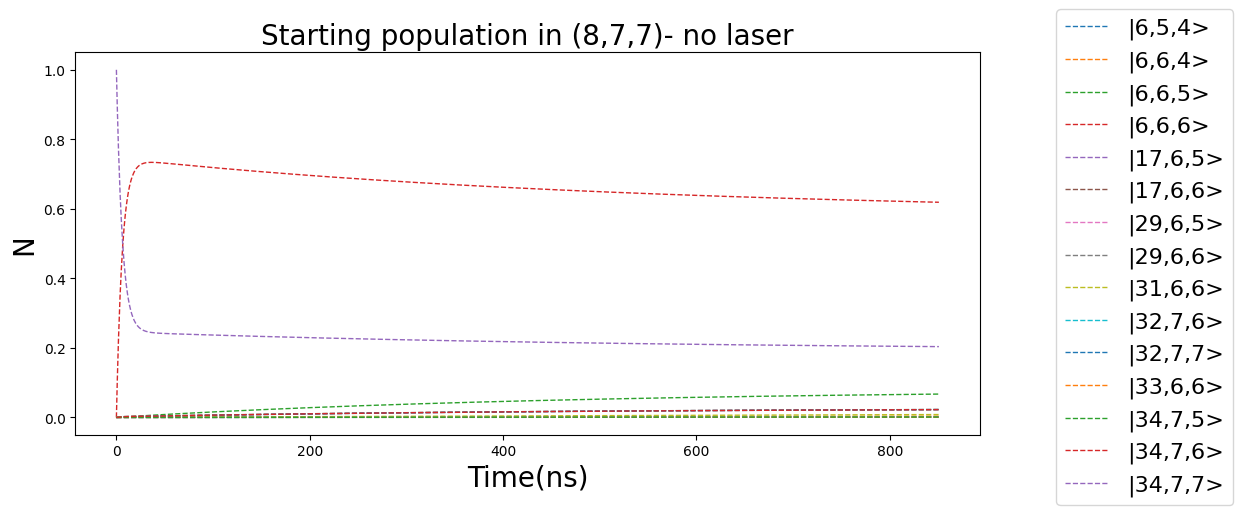

In [ ]:
pos_index = [3,4,5,6,7,8]

fig, ax = plt.subplots(1,1,sharex=True,sharey=True, figsize = (10,5))

j = 0

legend_elements = [plt.Line2D([0], [0], color= 'black', linestyle='--', lw=2, label=f'(state,F,M$_F$)')]

#plt.subplot(2,1,1)

for bob in range(len(rateeq.sol.y)):
    ee = fff[bob][0]
    ff = fff[bob][1]
    m = fff[bob][2]
    k = rateeq.sol.y[bob]

    if any(x >0.0005 for x in k):
    
        color = get_distinct_color()
        ax.plot(1e9*rateeq.sol.t ,rateeq.sol.y[bob],'--',color = color, linewidth=1.0,
        label='|' + ','.join([str(ee), str(ff), str(m)]) + '>')
        # ax[1].plot(1e9*rateeq1.sol.t ,rateeq1.sol.y[bob],'--',color = color, linewidth=1.0,
        # label='|' + ','.join([str(ee), str(ff), str(m)]) + '>')
        # legend_elements.append(plt.Line2D([0], [0], color= color, linestyle='--', lw=2, label=f'({pos_index[j]},{ff},{m})'))
        # j += 1
# handles, labels = [], []
# for axs in ax:
#     for handle, label in zip(*axs.get_legend_handles_labels()):
#         if label not in labels:  # Avoid duplicate labels
#             handles.append(handle)
#             labels.append(label)

 

# Create a single legend for the entire figure

fig.legend( bbox_to_anchor=(1.05, 0.5), loc='center left',fontsize = 16)
        #i += 3

ax.set_title('Starting population in (8,7,7)- no laser', fontsize = 20)
# ax[1].set_title('Starting population in (8,7,7)- laser tuned to cooling transition',fontsize = 20)
# ax[1].set_xlabel('Time(ns)',fontsize = 20)
ax.set_xlabel('Time(ns)',fontsize = 20)
ax.set_ylabel('N',fontsize = 20)


plt.tight_layout()
plt.show()

The initial population is now being put in and the popualtion then varrieed over time and plotted to see what happens

In [235]:
l = g(35850.31,Ee[29],med(35850.31,Ee[29]),5.5)



63916.021908512135


In [246]:
print((np.pi*(12e-3)**2/2)*1e3)

85799505893045.78


SyntaxError: unmatched ')' (2196461622.py, line 1)

In [216]:
Isat(35850.31,11594.54,85e6)

7.785005913562884e-36

In [231]:
f= (35850.31-11594.54)*29.9792458
f/1e9

0.000727169690898266

In [227]:
l**3*

7.007366012543564e-20